In [23]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
# from glob import globd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

First we will use ImageDataGenerator a class in the Keras library for deep learning,
which is used to preprocess image data.
The flow_from_directory method is used to generate batches of image data from a directory containing subdirectories of images, with each subdirectory representing a class label.
The method takes the path to the directory containing the images as an argument.



In [36]:
# Scale the pixel values of the images from a range of [0, 255] to [0, 1].
# Use 80% of the images for training and 20% for validation
# resize images
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.8)
data    = datagen.flow_from_directory("FMD_DATASET",
                                      target_size=(150, 150))

Found 14536 images belonging to 3 classes.


## Data information

In [52]:
# count_class = Counter(data.labels)
counts = np.bincount(data.labels)
print("classes: ",data.class_indices,
      "\nimage shape: ", data.image_shape,
      "\n  * class 'incorrect_mask' (0): ", counts[0],
      "\n  * class 'with_mask' (1): ", counts[1],
      "\n  * class 'without_mask' (2): ", counts[2],)

classes:  {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2} 
image shape:  (150, 150, 3) 
  * class 'incorrect_mask' (0):  5000 
  * class 'with_mask' (1):  4789 
  * class 'without_mask' (2):  4747


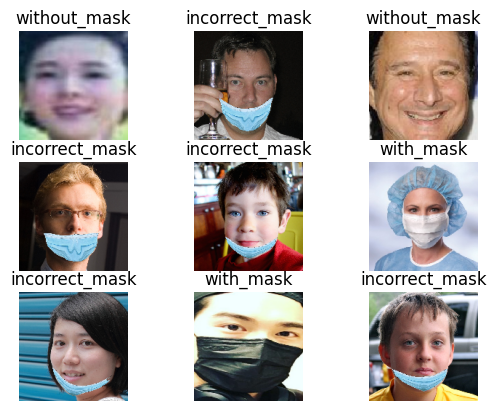

In [34]:
image_batch, labels_batch = data.next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    label = labels_batch[i]
    if np.array_equal(label,np.array([1.,0.,0.])):
        plt.title('incorrect_mask')
    elif np.array_equal(label,np.array([0.,1.,0.])):
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis("off")